In [5]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
from collections import OrderedDict

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0001 cost= 1.184507639
Epoch: 0002 cost= 0.665614431
Epoch: 0003 cost= 0.552896083
Epoch: 0004 cost= 0.498735195
Epoch: 0005 cost= 0.465510270
Epoch: 0006 cost= 0.442587218
Epoch: 0007 cost= 0.425472420
Epoch: 0008 cost= 0.412188749
Epoch: 0009 cost= 0.401403076
Epoch: 0010 cost= 0.392478671
Epoch: 0011 cost= 0.384750020
Epoch: 0012 cost= 0.378137538
Epoch: 0013 cost= 0.372405428
Epoch: 0014 cost= 0.367311091
Epoch: 0015 cost= 0.362750271
Epoch: 0016 cost= 0.358633149
Epoch: 0017 cost= 0.354869985
Epoch: 0018 cost= 0.351468185
Epoch: 0019 cost= 0.348313196
Epoch: 0020 cost= 0.345427602
Epoch: 0021 cost= 0.342761991
Epoch: 0022 cost= 0.340258296
Epoch: 0023 cost= 0.337927383
Epoch: 0024 cost= 0.335776236
Epoch: 0025 cost= 0.333676039
Optimization Finished!
Accuracy: 0.889


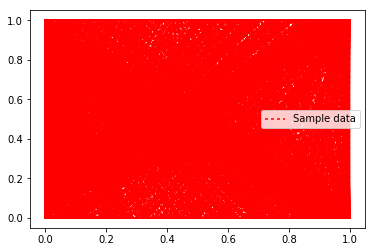

In [7]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]}))

#Plot sample data
plt.plot(batch_xs, batch_ys, 'ro', label='Sample data')
#Plot linear prediction
#plt.plot(batch_xs, pred, dashes=[2, 2], color='blue', label='Fitted line')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

tf.reset_default_graph()

In [8]:
tf.reset_default_graph()